In [1]:
import trackpy as tp 
import pims
import glob
import numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import bmc
from tqdm import trange
import os

In [2]:
directory = "../data/onion_4/Onion_bulk_20x/"
path = glob.glob(directory+"/*bmp")

In [3]:
nfiles = len(path)
indices = np.arange(nfiles)+1
files = np.array([], dtype=str)

for i in np.arange(nfiles)+1:
    file_name = glob.glob(directory+"/* %s.bmp"%i)[0]
    files = np.append(files, file_name)

Frame 451: 14 trajectories present.


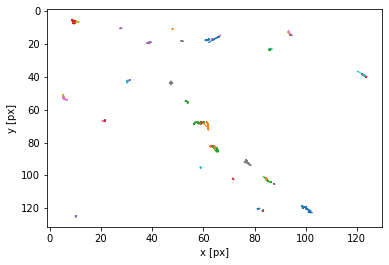

In [5]:
diameter=11
minmass=10
search_range=6
path = directory + "/*.bmp"

f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
t = bmc.get_trajectories(f, show=True, diameter=11, minmass=10, search_range=6, clip_stubs=25)
#plt.savefig("test.pdf")

In [6]:
directories = glob.glob("../data/onion_4/*")

Frame 246: 13 trajectories present.


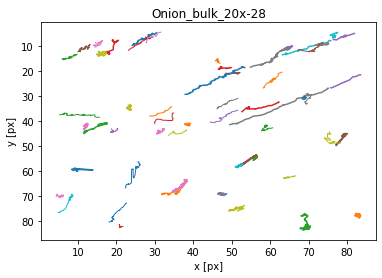

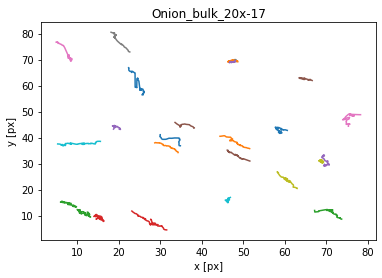

In [35]:
displacements = np.array([])
for dir_path in directories:
    path = dir_path + "/*bmp"
    f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
    t = bmc.get_trajectories(f, show=True, diameter=11, minmass=10, search_range=6, clip_stubs=25)

    outpath = "../data/plots/reduced_plots/"

    plt.figure()
    for i in np.unique(t["particle"]):
        df = t[t["particle"]==i]
        dx = np.diff(df["x"])
        dy = np.diff(df["y"])
        disp = np.sum(np.sqrt(dx**2 + dx**2))
        displacements = np.append(displacements, disp)
        if disp > 5:
            x_traj = df["x"]
            y_traj = df["y"]
            plt.plot(x_traj, y_traj)
        
    plt.title(os.path.basename(dir_path))
    plt.xlabel("x [px]")
    plt.ylabel("y [px]")
    plt.savefig(outpath + os.path.basename(dir_path)+".pdf")

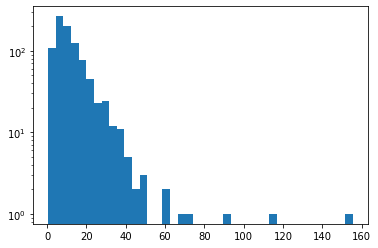

In [41]:
bins = np.linspace(0,2.5)

plt.figure()
_ = plt.hist(displacements,bins=40, log=1)#, bins=bins)#, log=1)

In [42]:
good_traj = ["Onion_bulk_20x-13", "Onion_bulk_20x-17", "Onion_bulk_20x-18", "Onion_bulk_20x-19",
             "Onion_bulk_20x-21", "Onion_bulk_20x-24", "Onion_bulk_20x-25", "Onion_bulk_20x-26",
             "Onion_bulk_20x-28"]

brownian = ["Onion_bulk_20x-6", "Onion_bulk_20x-16", "Onion_bulk_20x-27", "Onion_bulk_20x-29"]

Frame 249: 13 trajectories present.


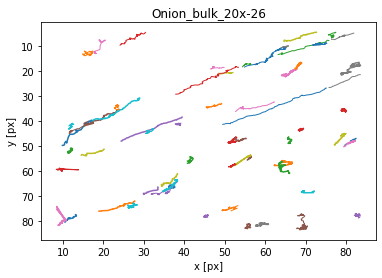

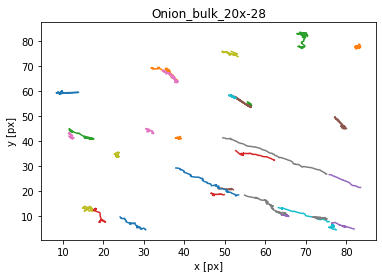

In [43]:
displacements = np.array([])
for dir_path in good_traj:
    path = "../data/onion_4/" + dir_path + "/*bmp"
    f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
    t = bmc.get_trajectories(f, show=True, diameter=11, minmass=10, search_range=6, clip_stubs=25)

    outpath = "../data/plots/best_plots/"

    plt.figure()
    for i in np.unique(t["particle"]):
        df = t[t["particle"]==i]
        dx = np.diff(df["x"])
        dy = np.diff(df["y"])
        disp = np.sum(np.sqrt(dx**2 + dx**2))
        displacements = np.append(displacements, disp)
        if disp > 5:
            x_traj = df["x"]
            y_traj = df["y"]
            plt.plot(x_traj, y_traj)
        
    plt.title(os.path.basename(dir_path))
    plt.xlabel("x [px]")
    plt.ylabel("y [px]")
    plt.savefig(outpath + os.path.basename(dir_path)+".pdf")

Frame 249: 13 trajectories present.


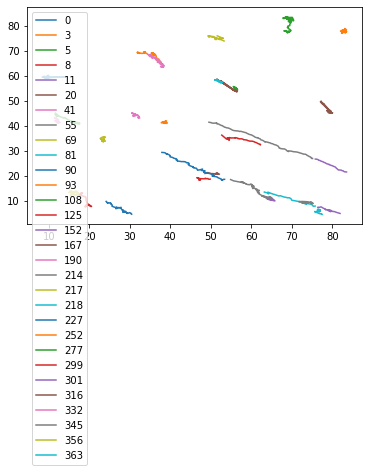

In [47]:
dir_path = good_traj[-1]
path = "../data/onion_4/" + dir_path + "/*bmp"

f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
t = bmc.get_trajectories(f, show=False, diameter=11, minmass=10, search_range=6, clip_stubs=25)

plt.figure()
for i in np.unique(t["particle"]):
    df = t[t["particle"]==i]
    dx = np.diff(df["x"])
    dy = np.diff(df["y"])
    disp = np.sum(np.sqrt(dx**2 + dx**2))
    displacements = np.append(displacements, disp)
    if disp > 5:
        x_traj = df["x"]
        y_traj = df["y"]
        plt.plot(x_traj, y_traj, label=i)
        
plt.legend()

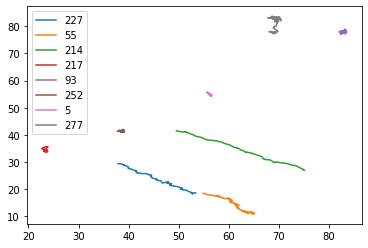

In [81]:
plt.figure()

indices = [227, 55, 214, 217, 93, 252, 5, 277]

for i in indices:
    df = t[t["particle"]==i]
    plt.plot(df["x"], df["y"], label="%s"%i)

plt.legend()

<AxesSubplot:xlabel='frame'>

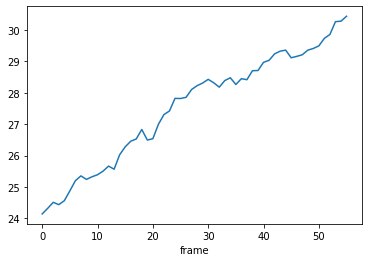

In [74]:
df['x'].plot()

x: [472052.31061195]
y: [142636.59187623]
quadrature: [493131.40368075]


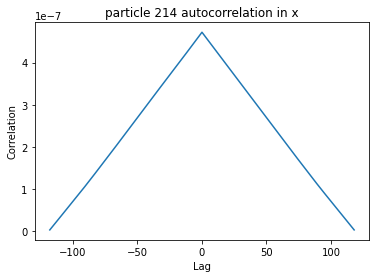

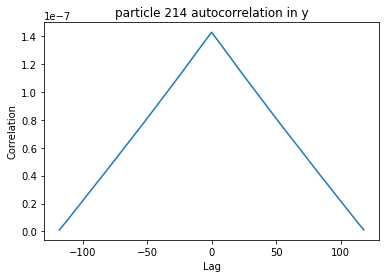

In [92]:
index = 214
df = t[t["particle"]==index]

plt.figure()
plt.title("particle %s autocorrelation in x"%index)
acx = np.correlate(df["x"].values*1e-6, df["x"].values*1e-6, mode="full")
xaxis = np.linspace((1-len(acx))/2, (len(acx)-1)/2, len(acx))
plt.plot(xaxis, acx)
plt.xlabel("Lag")
plt.ylabel("Correlation")
auto_x = np.correlate(df["x"], df["x"])
print("x:", auto_x)

plt.figure()
plt.title("particle %s autocorrelation in y"%index)
acy = np.correlate(df["y"].values*1e-6, df["y"].values*1e-6, mode="full")
xaxis = np.linspace((1-len(acy))/2, (len(acy)-1)/2, len(acy))
plt.plot(xaxis, acy)
plt.xlabel("Lag")
plt.ylabel("Correlation")
auto_y = np.correlate(df["y"], df["y"])
print("y:", auto_y)

print("quadrature:", np.sqrt(auto_x**2 + auto_y**2))

In [93]:
def mean_disp_frame(x, y):
    # correct
    return np.abs(np.diff(arr))/len(arr)

def total_disp(x, y):
    start_x = x[0]
    start_y = y[0]
    end_x = x[-1]
    end_y = y[-1]
    return np.sqrt((start_x - end_x)**2 + (start_y - end_y)**2)


In [ ]:

df